In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

<IPython.core.display.Javascript object>

n your pairs, work on the following exercise:
The data comes from a longitudinal study of lung tomography measurements of different groups of patients.

    Download at https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv
    

For each group, is there a significant difference between time 1 and time 2?

Is there a significant difference in the mean of all groups at time 2?

In [3]:
lungs = pd.read_csv("lung-volume.csv")

<IPython.core.display.Javascript object>

In [5]:
lungs.shape

(400, 4)

<IPython.core.display.Javascript object>

In [6]:
lungs.isna().sum()

group      0
patient    0
t1         0
t2         0
dtype: int64

<IPython.core.display.Javascript object>

In [4]:
lungs.head()

,group,patient,t1,t2
0,1,1-1,4226,4497
1,1,1-2,5731,5665
2,1,1-3,3912,4505
3,1,1-4,4811,6472
4,1,1-5,5128,4710


<IPython.core.display.Javascript object>

In [7]:
lungs["diff"] = lungs["t1"] - lungs["t2"]

<IPython.core.display.Javascript object>

In [9]:
lungs_1 = lungs[lungs["group"] == 1]
lungs_2 = lungs[lungs["group"] == 2]
lungs_3 = lungs[lungs["group"] == 3]

<IPython.core.display.Javascript object>

In [15]:
t, p = stats.ttest_rel(lungs_1["t1"], lungs_1["t2"])
p

0.7506087664956842

<IPython.core.display.Javascript object>

In [16]:
t, p = stats.ttest_rel(lungs_2["t1"], lungs_2["t2"])
p

0.7440142766032991

<IPython.core.display.Javascript object>

In [17]:
t, p = stats.ttest_rel(lungs_3["t1"], lungs_3["t2"])
p

0.37111115842334486

<IPython.core.display.Javascript object>

In [ ]:
#No groups show a significant difference between t1 and t2

In [18]:
f, p = stats.f_oneway(lungs_1["t2"], lungs_2["t2"], lungs_3["t2"])

f, p

(67.65846945026495, 5.1893599904179e-26)

<IPython.core.display.Javascript object>

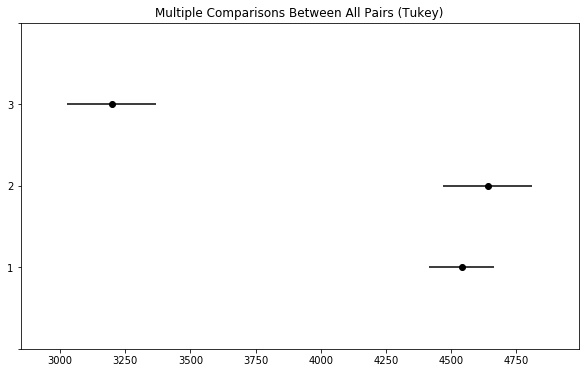

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,99.705,0.6902,-195.9612,395.3712,False
1,3,-1341.865,0.001,-1637.5312,-1046.1988,True
2,3,-1441.57,0.001,-1782.9759,-1100.1641,True


<IPython.core.display.Javascript object>

In [19]:
tukey_results = pairwise_tukeyhsd(lungs["t2"], lungs["group"])

tukey_results.plot_simultaneous()
plt.show()

# Show summary table of results
tukey_results.summary()

In [ ]:
#Group 3 second times are significantly different than the other two groups

In [20]:
f, p = stats.f_oneway(lungs_1["diff"], lungs_2["diff"], lungs_3["diff"])

f, p

(0.30218735532459357, 0.7393694353924287)

<IPython.core.display.Javascript object>